# The Stock Market Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4
pd.set_option('precision', 4)

In [7]:
market = pd.read_csv('../data/Smarket.csv', )
market = market.rename(columns = {'Unnamed: 0': 'Day'})
market.head()

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [8]:
market.shape

(1250, 10)

In [11]:
market.describe()

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.0000,1250.000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000,1250.0000
mean,625.5000,2003.016,0.0038,0.0039,0.0017,0.0016,0.0056,1.4783,0.0031
std,360.9882,1.409,1.1363,1.1363,1.1387,1.1388,1.1476,0.3604,1.1363
min,1.0000,2001.000,-4.9220,-4.9220,-4.9220,-4.9220,-4.9220,0.3561,-4.9220
25%,313.2500,2002.000,-0.6395,-0.6395,-0.6400,-0.6400,-0.6400,1.2574,-0.6395
50%,625.5000,2003.000,0.0390,0.0390,0.0385,0.0385,0.0385,1.4230,0.0385
75%,937.7500,2004.000,0.5968,0.5968,0.5968,0.5968,0.5970,1.6417,0.5968
max,1250.0000,2005.000,5.7330,5.7330,5.7330,5.7330,5.7330,3.1525,5.7330


In [13]:
market.corr(method = 'pearson')

,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Day,1.0000,0.9798,0.0354,0.0360,0.0390,0.0414,0.0350,0.5463,0.0353
Year,0.9798,1.0000,0.0297,0.0306,0.0332,0.0357,0.0298,0.5390,0.0301
Lag1,0.0354,0.0297,1.0000,-0.0263,-0.0108,-0.0030,-0.0057,0.0409,-0.0262
Lag2,0.0360,0.0306,-0.0263,1.0000,-0.0259,-0.0109,-0.0036,-0.0434,-0.0103
Lag3,0.0390,0.0332,-0.0108,-0.0259,1.0000,-0.0241,-0.0188,-0.0418,-0.0024
Lag4,0.0414,0.0357,-0.0030,-0.0109,-0.0241,1.0000,-0.0271,-0.0484,-0.0069
Lag5,0.0350,0.0298,-0.0057,-0.0036,-0.0188,-0.0271,1.0000,-0.0220,-0.0349
Volume,0.5463,0.5390,0.0409,-0.0434,-0.0418,-0.0484,-0.0220,1.0000,0.0146
Today,0.0353,0.0301,-0.0262,-0.0103,-0.0024,-0.0069,-0.0349,0.0146,1.0000


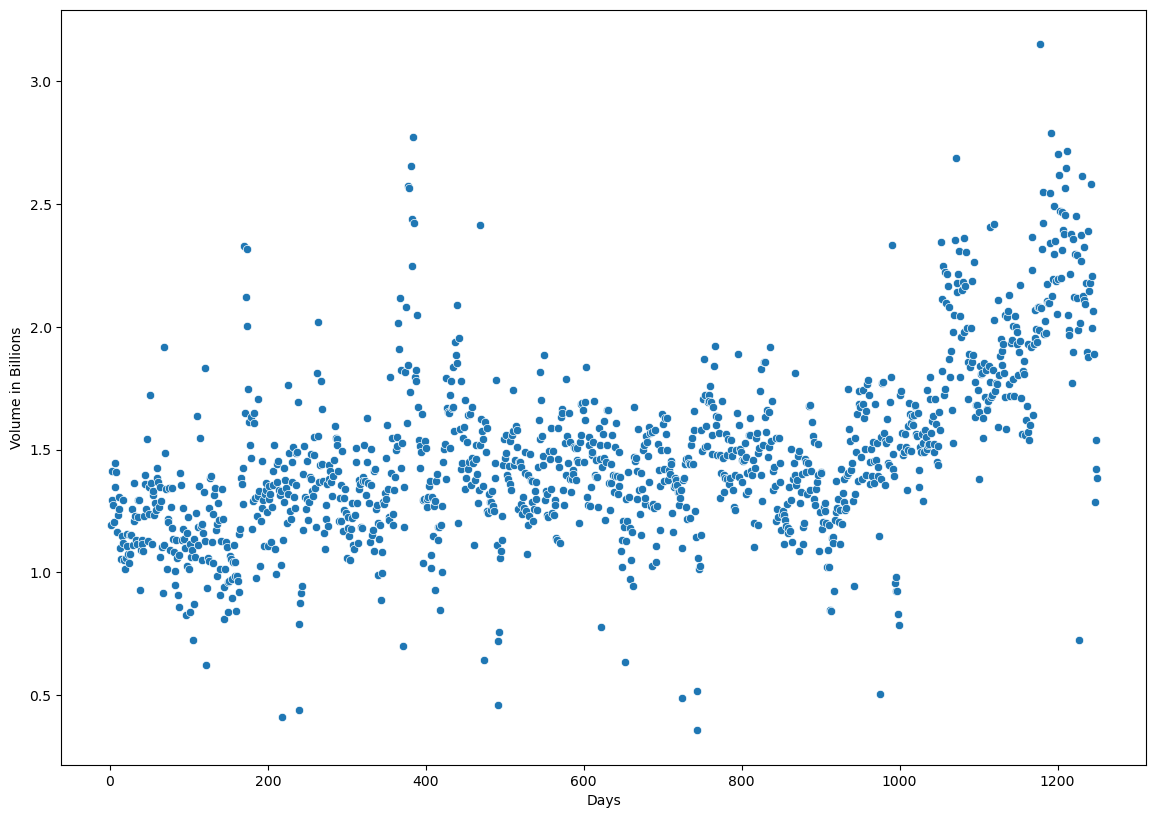

In [15]:
# Plot
_,ax = plt.subplots(figsize=(14,10), dpi=(100))

ax = sns.scatterplot(x = 'Day', y = 'Volume',data =market)
ax.set(xlabel = 'Days', ylabel = 'Volume in Billions')
plt.show()


## Logistic regression

Note : label the attributes "up" and "down" as 1/0, transfer the problem in to the logistic regression model

In [16]:
# Encode the response as 0,1 for the down/up
market['DirCoded'] = [0 if x == 'Down' else 1 for x in market.Direction]
market.head()


,Day,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,DirCoded
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


statsmodels solution

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# Build the model
f = "DirCoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume"
logit_fit = smf.logit(f, market).fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               DirCoded   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                0.002074
Time:                        16:57:10   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [23]:
logit_fit.params

Intercept   -0.1260
Lag1        -0.0731
Lag2        -0.0423
Lag3         0.0111
Lag4         0.0094
Lag5         0.0103
Volume       0.1354
dtype: float64

In [25]:
logit_probs = logit_fit.predict(market)
logit_probs.head()

0    0.5071
1    0.4815
2    0.4811
3    0.5152
4    0.5108
dtype: float64

Criterion parameter :The following commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [34]:
# make logit_pred with the prob theshold = 0.5

market['logit_pred'] = ['Up' if p > 0.5 else 'Down' for p in logit_probs]

table = pd.crosstab(market.Direction, market.logit_pred)
table

logit_pred,Down,Up
Direction,,
Down,145,457
Up,141,507


In [35]:
# Compute Model Accuracy
logit_acc = (table.Down[0] + table.Up[1])/logit_fit.nobs

In [36]:
print(f"The model made {logit_acc} correct predictions on the trainning set")

The model made 0.5216 correct predictions on the trainning set


0        True
1       False
2        True
3        True
4        True
        ...  
1245     True
1246    False
1247     True
1248    False
1249    False
Length: 1250, dtype: bool